<div class="usecase-title"><b>Title: </b>Tram and Bus Network Use Case</div>

<div class="usecase-authors"><b>Authored by: </b>Francis Rusli</div>

<div class="usecase-date"><b>Date: </b> August 2024</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b> Level: </b>Intermediate</div>
    <div class="usecase-skill"><b> Pre-requisite Skills: </b>Python, basic machine learning, <i>Optional</i> Google Collaborate access</div>
</div>

<div class="usecase-subsection-blurb">
  <i>Dataset 1:</i> City Circle tram stops 2014
  <br>
  <a href="https://data.melbourne.vic.gov.au/explore/dataset/city-circle-tram-stops/table/" target="_blank">Dataset Link</a>
  <br>
  <a href="https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/city-circle-tram-stops/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C" target="_blank">Metadata Link</a>
</div>
<br>

<div class="usecase-subsection-blurb">
  <i>Dataset 2:</i> Bus stops 2015
  <br>
  <a href="https://data.melbourne.vic.gov.au/explore/dataset/bus-stops/table/" target="_blank">Dataset Link</a>
  <br>
  <a href="https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/bus-stops/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C">Metadata Link</a>
</div>
<br>

<div class="usecase-subsection-blurb">
  <i>Dataset 3:</i> Landmarks and places of interest, including schools, theatres, health services, sports facilities, places of worship, galleries and museums.
  <br>
  <a href="https://data.melbourne.vic.gov.au/explore/dataset/landmarks-and-places-of-interest-including-schools-theatres-health-services-spor/table/?location=13,-37.81487,144.94881&basemap=mbs-7a7333" target="_blank">Dataset Link</a>
  <br>
  <a href="https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/landmarks-and-places-of-interest-including-schools-theatres-health-services-spor/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C">Metadata Link</a>
</div>

# <div class="usecase-section-header"><h4>Project Objective, Overview & Research</h4></div>


<div class="usecase-subtitle">
<i><b>User Story</b></i>
</div>

<div class="usecase-subsection-blurb"><i>"As a city council member, I want to analyze and optimize the distribution of bus and tram stops within Melbourne to ensure that public transportation is accessible and efficient for all residents. This information will help the City of Melbourne (CoM) to enhance transportation planning, reduce travel times, improve commuter satisfaction, and support sustainable urban mobility."

</i></div>

<div class="usecase-subtitle">
<i><b>Objective</b></i>

<div class="usecase-subsection-blurb">This use case aims to analyze the connectivity between tram and bus networks in Melbourne. The objective is to determine the accessibility and efficiency of the public transportation system by identifying areas with high connectivity, gaps in the network, and potential improvements for better service integration.</div>
<br>

<div class="usecase-subsection-blurb"><b>Part 1</b> includes set up, fetching or loading datasets, pre-processing, data cleaning, saving datasets, and merging datasets.</div>

<br>

<div class="usecase-subsection-blurb"><b>Part 2</b> contains an overview analysis of data structures, population spread and biodiversity of species. </div>

<div class="usecase-subtitle">
<i><b>Project Overview</b></i>
</div>
<div class="usecase-subsection-blurb">The objective of this project is to analyze and optimize the distribution of bus and tram stops within the City of Melbourne. By leveraging geographic and transportation data, the project aims to enhance the accessibility, efficiency, and sustainability of the city's public transportation network. Through data-driven insights, this initiative will support city council members in making informed decisions to improve commuter satisfaction, reduce travel times, and promote sustainable urban mobility. The project will also ensure compliance with safety and accessibility standards, ultimately contributing to a more connected and inclusive urban environment. </div>
<br>

<div class="usecase-subtitle">
<i><b>Benefits</b></i>
</div>

<div class="usecase-subsection-blurb">
<ol>
  <li><b>Identify areas with insufficient access to public transportation:</b> By mapping the locations of bus and tram stops, we can analyze the spatial distribution and determine if there are underserved areas where residents have to walk longer distances to reach a stop. This can guide the city council in placing new stops to improve overall accessibility.</li>
  <br>
  <li><b>Improve the efficiency and coverage of the public transportation network:</b> By analyzing the density and placement of stops, the city can optimize routes and schedules to reduce redundancy and improve service frequency. This can lead to a more efficient transportation network, reducing travel times and increasing commuter satisfaction. </li>
  <br>
  <li><b>Support sustainable urban development and environmental goals:</b> Encouraging the use of public transportation by ensuring stops are conveniently located can reduce reliance on private vehicles, leading to lower traffic congestion and reduced carbon emissions. Additionally, this data can be integrated into broader urban planning efforts to create a more sustainable and livable city.</li>
</ol>
</div>

<div class="usecase-subtitle">
<i><b>Research</b></i></div>
<div class="usecase-subsection-blurb">
This research project focuses on analyzing and optimizing the distribution of bus and tram stops within the City of Melbourne. The aim is to enhance accessibility, efficiency, and sustainability of the public transportation network. The findings will be crucial for informing transportation planning and policy-making, ultimately improving commuter satisfaction and supporting sustainable urban mobility.</div>
<br>
<div class="usecase-subsection-blurb">
Part 1 (First 3 Weeks): Utilizing Python and Jupyter Notebook, the initial stage involves setting up, data cleaning, and preprocessing, followed by a basic analysis focusing on the spatial distribution of bus and tram stops. The outcome will be an initial understanding of the current accessibility and coverage of public transportation stops in Melbourne.

Part 2 (Next 3 Weeks): This phase dives into detailed analysis and optimization. It aims to identify underserved areas, optimize the placement of stops, and evaluate the impact of public transportation on urban mobility. The project concludes with strategic recommendations for improving the efficiency and sustainability of Melbourne's public transportation network, and providing data-driven insights for future transportation planning.</div>

<div class="usecase-subtitle">
    <i><b>Conclusion</b></i>
</div>
<div class="usecase-subsection-blurb">
   conclusion here
</div>
<br>
<div class="usecase-subsection-blurb">

</div>
<br>


### Importing Libraries and Data

In [30]:
#Import core libraries
import requests
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import json

import ipywidgets as widgets
from ipywidgets import interact

import osmnx as ox
import geopandas as gpd
import networkx as nx

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [31]:
# Define the company colors format for matplotlib
dark_theme_colors = ['#08af64', '#14a38e', '#0f9295', '#056b8a', '#121212'] #Dark theme
light_theme_colors = ['#2af598', '#22e4ac', '#1bd7bb', '#14c9cb', '#0fbed8', '#08b3e5'] #Light theme

In [32]:
# API
def fetch_data(base_url, dataset, api_key, num_records=99, offset=0):
    all_records = []
    max_offset = 9900

    while True:
        if offset > max_offset:
            break

        filters = f'{dataset}/records?limit={num_records}&offset={offset}'
        url = f'{base_url}{filters}&api_key={api_key}'

        try:
            result = requests.get(url, timeout = 10)
            result.raise_for_status()
            records = result.json().get('results')
        except requests.exceptions.RequestException as e:
            raise Exception(f'API request failed: {e}')
        if records is None:
            break
        all_records.extend(records)
        if len(records) < num_records:
            break

        offset += num_records

    df = pd.DataFrame(all_records)
    return df

BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
API_KEY = ''

### Loading the data

In [33]:
# Bus dataset
SENSOR_DATASET = 'bus-stops'
bus_stop = fetch_data(BASE_URL, SENSOR_DATASET, API_KEY)
bus_stop.head()

,geo_point_2d,geo_shape,prop_id,addresspt1,addressp_1,asset_clas,asset_type,objectid,str_id,addresspt,asset_subt,model_desc,mcc_id,roadseg_id,descriptio,model_no
0,"{'lon': 144.96889648633675, 'lat': -37.8184248...","{'type': 'Feature', 'geometry': {'coordinates'...",573333,29.149053,288,Signage,Sign - Public Transport,749,1249454,606816,None,Sign - Public Transport 1 Panel,1249454,0,Sign - Public Transport 1 Panel Bus Stop Type 12,P.16
1,"{'lon': 144.95888238475013, 'lat': -37.8176759...","{'type': 'Feature', 'geometry': {'coordinates'...",0,10.537902,105,Signage,Sign - Public Transport,2098,1247042,507646,None,Sign - Public Transport 1 Panel,1247042,20118,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
2,"{'lon': 144.95963193312105, 'lat': -37.7818891...","{'type': 'Feature', 'geometry': {'coordinates'...",0,25.269643,212,Signage,Sign - Public Transport,2143,1252383,108510,None,Sign - Public Transport 1 Panel,1252383,22387,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
3,"{'lon': 144.94716743007305, 'lat': -37.7937265...","{'type': 'Feature', 'geometry': {'coordinates'...",0,44.230506,237,Signage,Sign - Public Transport,2627,1249788,100087,None,Sign - Public Transport 1 Panel,1249788,20919,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
4,"{'lon': 144.92778487963457, 'lat': -37.8028616...","{'type': 'Feature', 'geometry': {'coordinates'...",0,67.718553,360,Signage,Sign - Public Transport,3306,1235311,103002,None,Sign - Public Transport 1 Panel,1235311,21680,Sign - Public Transport 1 Panel Bus Stop Type 13,P.16


In [34]:
# Tram dataset
SENSOR_DATASET = 'city-circle-tram-stops'
tram_stop = fetch_data(BASE_URL, SENSOR_DATASET, API_KEY)
tram_stop.head()

,geo_point_2d,geo_shape,name,xorg,stop_no,mccid_str,xsource,xdate,mccid_int
0,"{'lon': 144.95786314283018, 'lat': -37.8202377...","{'type': 'Feature', 'geometry': {'coordinates'...",Melbourne Aquarium / Flinders Street,GIS Team,2,None,Mapbase,2011-10-18,4
1,"{'lon': 144.95546153614245, 'lat': -37.8209726...","{'type': 'Feature', 'geometry': {'coordinates'...",Spencer Street / Flinders Street,GIS Team,1,None,Mapbase,2011-10-18,5
2,"{'lon': 144.95109855638137, 'lat': -37.8219046...","{'type': 'Feature', 'geometry': {'coordinates'...",The Goods Shed / Wurundjeri Way,GIS Team,D5,None,Mapbase,2011-10-18,7
3,"{'lon': 144.95644059700524, 'lat': -37.8117714...","{'type': 'Feature', 'geometry': {'coordinates'...",William Street / La Trobe Street,GIS Team,3,None,Mapbase,2011-10-18,16
4,"{'lon': 144.95891745116262, 'lat': -37.8110592...","{'type': 'Feature', 'geometry': {'coordinates'...",Queen Street / La Trobe Street,GIS Team,4,None,Mapbase,2011-10-18,17


In [35]:
# Places of interest dataset
SENSOR_DATASET = 'landmarks-and-places-of-interest-including-schools-theatres-health-services-spor'
places_ofinterest = fetch_data(BASE_URL, SENSOR_DATASET, API_KEY)
places_ofinterest.head()

,theme,sub_theme,feature_name,co_ordinates
0,Transport,Railway Station,Flemington Bridge Railway Station,"{'lon': 144.939277838304, 'lat': -37.788164588..."
1,Mixed Use,Retail/Office/Carpark,Council House 2 (CH2),"{'lon': 144.966638432727, 'lat': -37.814259143..."
2,Leisure/Recreation,Informal Outdoor Facility (Park/Garden/Reserve),Carlton Gardens South,"{'lon': 144.971266479841, 'lat': -37.806068457..."
3,Place of Worship,Church,Wesley Church,"{'lon': 144.968168215633, 'lat': -37.810157644..."
4,Place of Worship,Church,St Augustines Church,"{'lon': 144.954862000132, 'lat': -37.816974135..."


### Cleaning data process

In [36]:
# Check for missing values in the dataset
missing_values = bus_stop.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop the unnecessary columns and assign to a new DataFrame
bus_stop_cleaned = bus_stop.drop(columns=['asset_subt', 'prop_id', 'objectid', 'str_id', 'roadseg_id', 'model_desc', 'mcc_id', 'model_no'])

# Verify that the columns have been dropped
print("Columns after dropping unnecessary columns:\n", bus_stop_cleaned.columns)

# Preview the cleaned dataset
print(bus_stop_cleaned.head())


Missing values in each column:
 geo_point_2d      0
geo_shape         0
prop_id           0
addresspt1        0
addressp_1        0
asset_clas        0
asset_type        0
objectid          0
str_id            0
addresspt         0
asset_subt      309
model_desc        0
mcc_id            0
roadseg_id        0
descriptio        0
model_no          0
dtype: int64
Columns after dropping unnecessary columns:
 Index(['geo_point_2d', 'geo_shape', 'addresspt1', 'addressp_1', 'asset_clas',
       'asset_type', 'addresspt', 'descriptio'],
      dtype='object')
                                        geo_point_2d  \
0  {'lon': 144.96889648633675, 'lat': -37.8184248...   
1  {'lon': 144.95888238475013, 'lat': -37.8176759...   
2  {'lon': 144.95963193312105, 'lat': -37.7818891...   
3  {'lon': 144.94716743007305, 'lat': -37.7937265...   
4  {'lon': 144.92778487963457, 'lat': -37.8028616...   

                                           geo_shape  addresspt1  addressp_1  \
0  {'type': 'Feature', '

In [37]:
# Check for missing values
missing_values_tram = tram_stop.isnull().sum()
print("Missing values in each column:\n", missing_values_tram)

# Drop the 'mccid_str' and 'mccid_int' column as it contains missing values and is not needed
tram_stop_cleaned = tram_stop.drop(columns=['mccid_str', 'mccid_int'])

# Verify that the column has been dropped
print("Columns after dropping 'mccid_str':\n", tram_stop_cleaned.columns)

# Preview the cleaned dataset
print(tram_stop_cleaned.head())

Missing values in each column:
 geo_point_2d     0
geo_shape        0
name             0
xorg             0
stop_no          0
mccid_str       28
xsource          0
xdate            0
mccid_int        0
dtype: int64
Columns after dropping 'mccid_str':
 Index(['geo_point_2d', 'geo_shape', 'name', 'xorg', 'stop_no', 'xsource',
       'xdate'],
      dtype='object')
                                        geo_point_2d  \
0  {'lon': 144.95786314283018, 'lat': -37.8202377...   
1  {'lon': 144.95546153614245, 'lat': -37.8209726...   
2  {'lon': 144.95109855638137, 'lat': -37.8219046...   
3  {'lon': 144.95644059700524, 'lat': -37.8117714...   
4  {'lon': 144.95891745116262, 'lat': -37.8110592...   

                                           geo_shape  \
0  {'type': 'Feature', 'geometry': {'coordinates'...   
1  {'type': 'Feature', 'geometry': {'coordinates'...   
2  {'type': 'Feature', 'geometry': {'coordinates'...   
3  {'type': 'Feature', 'geometry': {'coordinates'...   
4  {'type': 'Feat

In [38]:
# Check for missing values
missing_values_place = places_ofinterest.isnull().sum()
print("Missing values in each column:\n", missing_values_place)


Missing values in each column:
 theme           0
sub_theme       0
feature_name    0
co_ordinates    0
dtype: int64


### Separating longitude and latitude for data merging

In [39]:
# Extract latitude and longitude from the dictionaries in 'geo_point_2d' for bus stops
bus_stop_cleaned['longitude'] = bus_stop_cleaned['geo_point_2d'].apply(lambda x: x['lon'])
bus_stop_cleaned['latitude'] = bus_stop_cleaned['geo_point_2d'].apply(lambda x: x['lat'])

# Extract latitude and longitude from the dictionaries in 'geo_point_2d' for tram stops
tram_stop_cleaned['longitude'] = tram_stop_cleaned['geo_point_2d'].apply(lambda x: x['lon'])
tram_stop_cleaned['latitude'] = tram_stop_cleaned['geo_point_2d'].apply(lambda x: x['lat'])

# Extract latitude and longitude from the dictionary-like 'co_ordinates' column for landmarks and places of interest
places_ofinterest['longitude'] = places_ofinterest['co_ordinates'].apply(lambda x: x['lon'])
places_ofinterest['latitude'] = places_ofinterest['co_ordinates'].apply(lambda x: x['lat'])

# Verify the result
print(bus_stop_cleaned[['latitude', 'longitude']].head())
print(tram_stop_cleaned[['latitude', 'longitude']].head())
print(places_ofinterest[['latitude', 'longitude']].head())

    latitude   longitude
0 -37.818425  144.968896
1 -37.817676  144.958882
2 -37.781889  144.959632
3 -37.793727  144.947167
4 -37.802862  144.927785
    latitude   longitude
0 -37.820238  144.957863
1 -37.820973  144.955462
2 -37.821905  144.951099
3 -37.811771  144.956441
4 -37.811059  144.958917
    latitude   longitude
0 -37.788165  144.939278
1 -37.814259  144.966638
2 -37.806068  144.971266
3 -37.810158  144.968168
4 -37.816974  144.954862


### Adding identifier before merging

In [40]:
# Add a column indicating the type of data in each dataset
places_ofinterest['type'] = 'place_of_interest'
bus_stop_cleaned['type'] = 'bus_stop'
tram_stop_cleaned['type'] = 'tram_stop'


### Merging datasets

In [41]:
# Merge the three datasets into one
combined_df = pd.concat([places_ofinterest, bus_stop_cleaned, tram_stop_cleaned], ignore_index=True)

# Display the first few rows of the merged dataset
print(combined_df.head())


                theme                                        sub_theme  \
0           Transport                                  Railway Station   
1           Mixed Use                            Retail/Office/Carpark   
2  Leisure/Recreation  Informal Outdoor Facility (Park/Garden/Reserve)   
3    Place of Worship                                           Church   
4    Place of Worship                                           Church   

                        feature_name  \
0  Flemington Bridge Railway Station   
1              Council House 2 (CH2)   
2              Carlton Gardens South   
3                      Wesley Church   
4               St Augustines Church   

                                        co_ordinates   longitude   latitude  \
0  {'lon': 144.939277838304, 'lat': -37.788164588...  144.939278 -37.788165   
1  {'lon': 144.966638432727, 'lat': -37.814259143...  144.966638 -37.814259   
2  {'lon': 144.971266479841, 'lat': -37.806068457...  144.971266 -37.806068  

In [42]:
combined_df.head()

,theme,sub_theme,feature_name,co_ordinates,longitude,latitude,type,geo_point_2d,geo_shape,addresspt1,addressp_1,asset_clas,asset_type,addresspt,descriptio,name,xorg,stop_no,xsource,xdate
0,Transport,Railway Station,Flemington Bridge Railway Station,"{'lon': 144.939277838304, 'lat': -37.788164588...",144.939278,-37.788165,place_of_interest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mixed Use,Retail/Office/Carpark,Council House 2 (CH2),"{'lon': 144.966638432727, 'lat': -37.814259143...",144.966638,-37.814259,place_of_interest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Leisure/Recreation,Informal Outdoor Facility (Park/Garden/Reserve),Carlton Gardens South,"{'lon': 144.971266479841, 'lat': -37.806068457...",144.971266,-37.806068,place_of_interest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Place of Worship,Church,Wesley Church,"{'lon': 144.968168215633, 'lat': -37.810157644...",144.968168,-37.810158,place_of_interest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Place of Worship,Church,St Augustines Church,"{'lon': 144.954862000132, 'lat': -37.816974135...",144.954862,-37.816974,place_of_interest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Statistical Summary
Summary statistics for the distances from places of interest to the nearest bus and tram stops.

In [43]:
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# Filter out only the places of interest
places_of_interest = combined_df[combined_df['type'] == 'place_of_interest']
bus_stops = combined_df[combined_df['type'] == 'bus_stop']
tram_stops = combined_df[combined_df['type'] == 'tram_stop']

# Function to calculate distance between two points based on latitude and longitude
def calculate_nearest_transport(place_row, transport_df):
    place_coords = (place_row['latitude'], place_row['longitude'])
    distances = transport_df.apply(lambda row: geodesic(place_coords, (row['latitude'], row['longitude'])).meters, axis=1)
    nearest_distance = distances.min()
    return nearest_distance

# Calculate nearest bus stop and tram stop distances for places of interest
places_of_interest['bus_stop_distance'] = places_of_interest.apply(lambda row: calculate_nearest_transport(row, bus_stops), axis=1)
places_of_interest['tram_stop_distance'] = places_of_interest.apply(lambda row: calculate_nearest_transport(row, tram_stops), axis=1)

# Generate statistical summary for distances
distance_summary = places_of_interest[['bus_stop_distance', 'tram_stop_distance']].describe()
print(distance_summary)

       bus_stop_distance  tram_stop_distance
count         242.000000          242.000000
mean          324.625045          922.667537
std           255.960463          960.394825
min            17.165896           31.962195
25%           118.900288          207.283751
50%           238.438672          516.094049
75%           468.284987         1315.972094
max          1047.816203         4329.226582


**Mean distances**: On average, places of interest are approximately 325 meters away from the nearest bus stop and 923 meters away from the nearest tram stop.

**Minimum distances**: The closest bus stop to any place of interest is just 17 meters away, and the closest tram stop is 32 meters away.

**Distribution**: The histograms display how these distances are spread, with more places of interest located closer to bus stops than tram stops.

### Distribution of distances to the nearest bus and tram stops

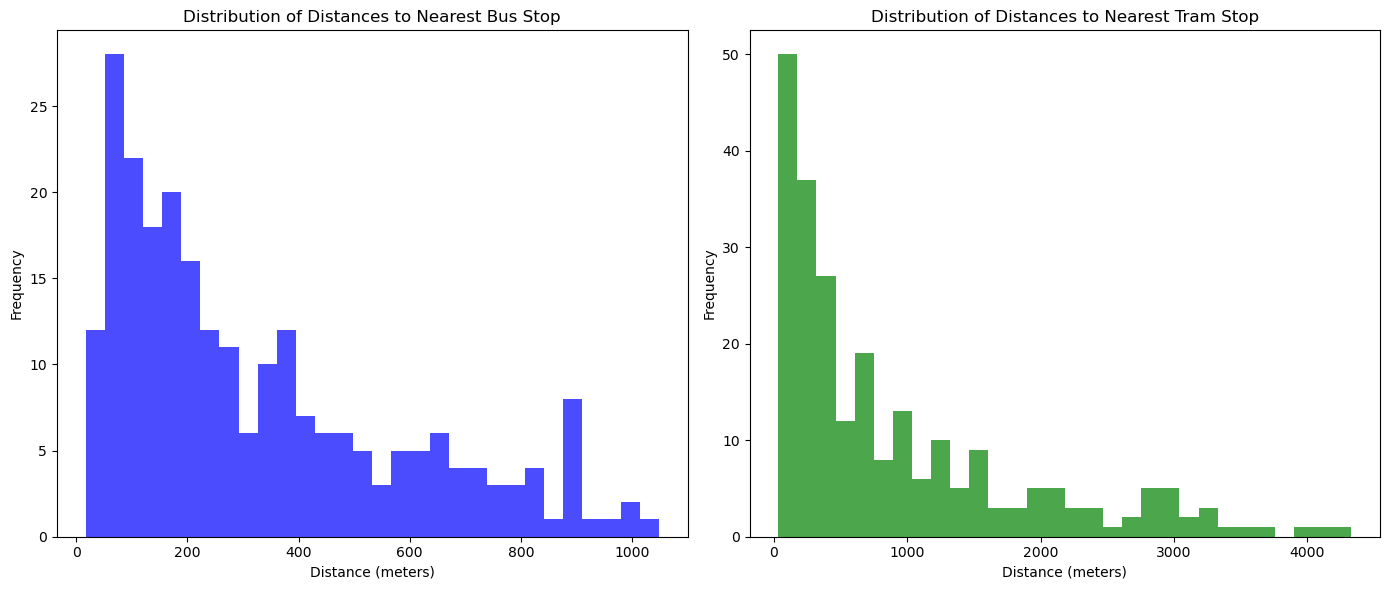

In [44]:
# Plot histograms for bus and tram stop distances
plt.figure(figsize=(14, 6))

# Histogram for bus stop distances
plt.subplot(1, 2, 1)
plt.hist(places_of_interest['bus_stop_distance'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Distances to Nearest Bus Stop')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')

# Histogram for tram stop distances
plt.subplot(1, 2, 2)
plt.hist(places_of_interest['tram_stop_distance'].dropna(), bins=30, color='green', alpha=0.7)
plt.title('Distribution of Distances to Nearest Tram Stop')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Relationship between the proximity of places of interest to bus and tram stops

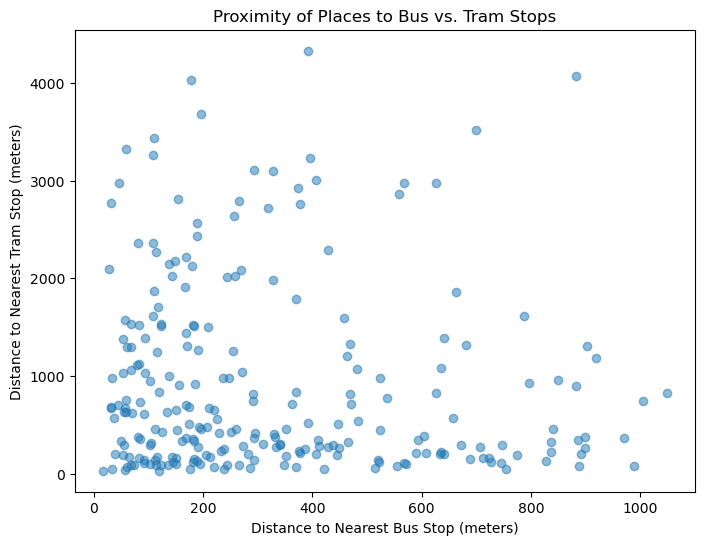

In [45]:
# Scatter plot comparing distances to nearest bus and tram stops
plt.figure(figsize=(8, 6))
plt.scatter(places_of_interest['bus_stop_distance'], places_of_interest['tram_stop_distance'], alpha=0.5)
plt.title('Proximity of Places to Bus vs. Tram Stops')
plt.xlabel('Distance to Nearest Bus Stop (meters)')
plt.ylabel('Distance to Nearest Tram Stop (meters)')
plt.show()

**Axes:**

- X-Axis (Horizontal): Represents the distance from places of interest to the nearest bus stop (in meters).
- Y-Axis (Vertical): Represents the distance from places of interest to the nearest tram stop (in meters).

**Each Point:**

- Each point on the plot represents a single place of interest.
- The position of the point indicates how far that place is from the nearest bus stop and tram stop.

### Distribution of Distances Boxplot

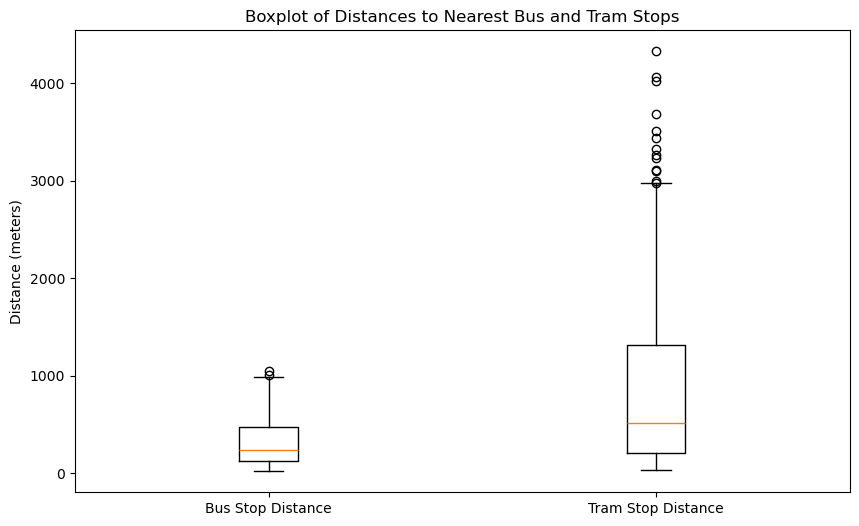

In [46]:
# Boxplot for bus and tram stop distances
plt.figure(figsize=(10, 6))
plt.boxplot([places_of_interest['bus_stop_distance'].dropna(), places_of_interest['tram_stop_distance'].dropna()], 
            labels=['Bus Stop Distance', 'Tram Stop Distance'])
plt.title('Boxplot of Distances to Nearest Bus and Tram Stops')
plt.ylabel('Distance (meters)')
plt.show()


The boxplot shows that places of interest are generally closer to bus stops than to tram stops, and there is more consistency in the proximity of bus stops. Tram stop distances, on the other hand, have greater variability and outliers, indicating that tram access may not be as uniformly distributed.

### Correlation Between Variables

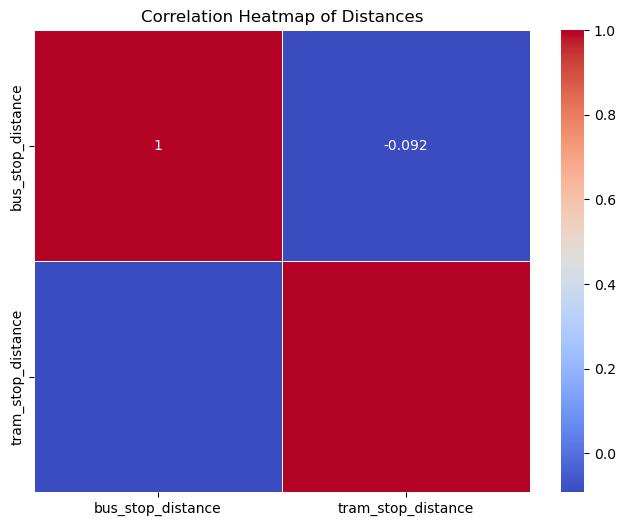

In [47]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = places_of_interest[['bus_stop_distance', 'tram_stop_distance']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Distances')
plt.show()


The distances to bus stops and tram stops are almost independent of each other. This suggests that places of interest that are close to a bus stop aren't necessarily close to a tram stop, and vice versa.


### Distribution of Distances

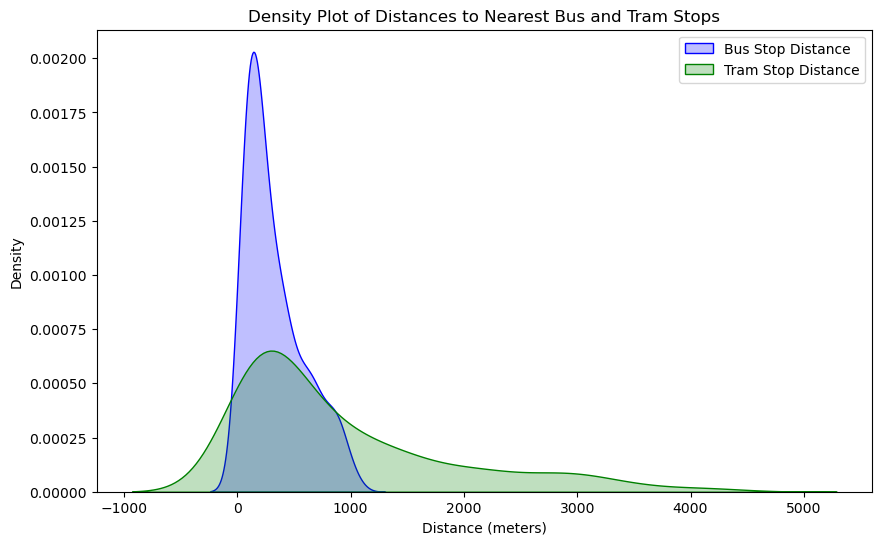

In [48]:
# Density plot for bus and tram stop distances
plt.figure(figsize=(10, 6))
sns.kdeplot(places_of_interest['bus_stop_distance'].dropna(), color='blue', shade=True, label='Bus Stop Distance')
sns.kdeplot(places_of_interest['tram_stop_distance'].dropna(), color='green', shade=True, label='Tram Stop Distance')
plt.title('Density Plot of Distances to Nearest Bus and Tram Stops')
plt.xlabel('Distance (meters)')
plt.ylabel('Density')
plt.legend()
plt.show()


- Proximity to Bus Stops: Most places of interest are relatively close to bus stops, with a significant portion being within a few hundred meters. The blue curve has a sharp peak around 0-200 meters, indicating that a large number of places of interest are very close to a bus stop.
- Proximity to Tram Stops: Places of interest tend to be farther away from tram stops on average, with a greater range of distances. This suggests that trams may not serve all areas as efficiently as buses.

### Categorical Bar Plot: Average Distance by Theme

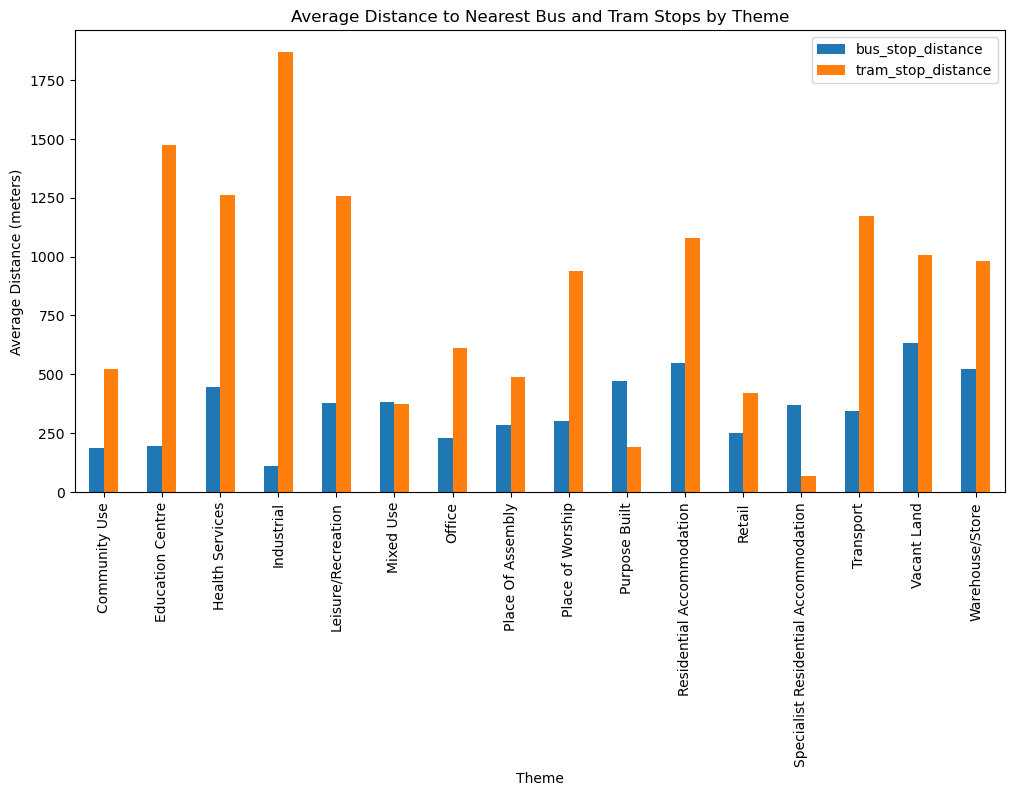

In [49]:
# Group by theme and calculate mean distances
theme_avg_distances = places_of_interest.groupby('theme').agg({
    'bus_stop_distance': 'mean',
    'tram_stop_distance': 'mean'
}).reset_index()

# Plot average distances by theme
theme_avg_distances.plot(kind='bar', x='theme', y=['bus_stop_distance', 'tram_stop_distance'], figsize=(12, 6))
plt.title('Average Distance to Nearest Bus and Tram Stops by Theme')
plt.xlabel('Theme')
plt.ylabel('Average Distance (meters)')
plt.xticks(rotation=90)
plt.show()


### Geospatial Visualization (Interactive Maps)

In [50]:
import folium
import pandas as pd
from folium.plugins import FloatImage
from folium.features import DivIcon

# Filter out places of interest, bus stops, and tram stops
places_of_interest = combined_df[combined_df['type'] == 'place_of_interest']
bus_stops = combined_df[combined_df['type'] == 'bus_stop']
tram_stops = combined_df[combined_df['type'] == 'tram_stop']

# Create a map centered on Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add places of interest to the map
for _, row in places_of_interest.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=row['feature_name'], 
                  icon=folium.Icon(color='blue', icon='info-sign')).add_to(m)

# Add bus stops to the map with a custom bus icon
for _, row in bus_stops.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=row['descriptio'], 
                  icon=folium.Icon(color='red', icon='cloud')).add_to(m)

# Add tram stops to the map with a custom tram icon
for _, row in tram_stops.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=row['name'], 
                  icon=folium.Icon(color='green', icon='ok-sign')).add_to(m)

# Add a legend to the map
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 90px; 
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <b>Legend</b> <br>
     &nbsp; <i class="fa fa-map-marker" style="color:blue"></i>&nbsp; Places of Interest <br>
     &nbsp; <i class="fa fa-map-marker" style="color:red"></i>&nbsp; Bus Stops <br>
     &nbsp; <i class="fa fa-map-marker" style="color:green"></i>&nbsp; Tram Stops
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m


- Places of Interest: Blue markers on the map.
- Bus Stops: Red markers.
- Tram Stops: Green markers.


### Identifying Gaps and Opportunities
**Service Gap Analysis**: Identify areas or themes that are underserved by public transport (especially those with longer distances to stops). This analysis will prioritize locations for new bus or tram stops.

**Accessibility Clustering**: Use clustering algorithms (e.g., K-means clustering) to group places of interest based on their accessibility to public transport. This will identify clusters of well-connected vs. poorly connected areas.

**Outlier Analysis**: Analyze outliers in the data—places of interest that are much farther from public transport than others.

In [51]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.cluster import KMeans

# Filter for places of interest
places_of_interest = places_of_interest[places_of_interest['type'] == 'place_of_interest']

# Ensure longitude and latitude are numeric
places_of_interest['longitude'] = pd.to_numeric(places_of_interest['longitude'], errors='coerce')
places_of_interest['latitude'] = pd.to_numeric(places_of_interest['latitude'], errors='coerce')

bus_stops = bus_stops[bus_stops['type'] == 'bus_stop']
tram_stops = tram_stops[tram_stops['type'] == 'tram_stop']

# Recalculate distances between places of interest and bus/tram stops
def calculate_nearest_transport(place_row, transport_df):
    place_coords = (place_row['latitude'], place_row['longitude'])
    distances = transport_df.apply(lambda row: geodesic(place_coords, (row['latitude'], row['longitude'])).meters, axis=1)
    nearest_distance = distances.min()
    return nearest_distance

# Calculate nearest bus stop and tram stop distances for places of interest
places_of_interest['bus_stop_distance'] = places_of_interest.apply(lambda row: calculate_nearest_transport(row, bus_stops), axis=1)
places_of_interest['tram_stop_distance'] = places_of_interest.apply(lambda row: calculate_nearest_transport(row, tram_stops), axis=1)

# 1. Service Gap Analysis: Calculate the furthest places of interest from public transport (bus or tram)
places_of_interest['max_transport_distance'] = places_of_interest[['bus_stop_distance', 'tram_stop_distance']].max(axis=1)

# Identify the top outliers based on distance from any public transport stop
outliers = places_of_interest.nlargest(10, 'max_transport_distance')

# 2. KMeans Clustering for Accessibility Clustering
# We'll use the distances to bus and tram stops as features for clustering
X = places_of_interest[['bus_stop_distance', 'tram_stop_distance']].dropna()

# Apply KMeans clustering (choosing 3 clusters for simplicity)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
places_of_interest['cluster'] = kmeans.labels_

# Print the outliers (service gaps) and clusters for analysis
print("Outliers (Top 10 Places Farthest from Public Transport):")
print(outliers[['feature_name', 'theme', 'bus_stop_distance', 'tram_stop_distance', 'max_transport_distance']])

print("\nCluster Assignments (Places Grouped by Accessibility):")
print(places_of_interest[['feature_name', 'theme', 'bus_stop_distance', 'tram_stop_distance', 'cluster']].head())

Outliers (Top 10 Places Farthest from Public Transport):
                                 feature_name               theme  \
222                     Melbourne Showgrounds  Leisure/Recreation   
54      Flemington Racecourse Railway Station           Transport   
218  Showgrounds Railway Station (Flemington)           Transport   
181                            Wesley College    Education Centre   
91                      Flemington Racecourse  Leisure/Recreation   
220                           Alfred Hospital     Health Services   
124                Royal Park Railway Station           Transport   
110                         Newmarket Reserve  Leisure/Recreation   
148                             Westgate Park  Leisure/Recreation   
16                     Royal Park Golf Course  Leisure/Recreation   

     bus_stop_distance  tram_stop_distance  max_transport_distance  
222         391.561447         4329.226582             4329.226582  
54          882.037246         4067.808277   

In [52]:
outliers

,theme,sub_theme,feature_name,co_ordinates,longitude,latitude,type,geo_point_2d,geo_shape,addresspt1,...,addresspt,descriptio,name,xorg,stop_no,xsource,xdate,bus_stop_distance,tram_stop_distance,max_transport_distance
222,Leisure/Recreation,"Outdoor Recreation Facility (Zoo, Golf Course)",Melbourne Showgrounds,"{'lon': 144.910822117306, 'lat': -37.782309785...",144.910822,-37.782310,place_of_interest,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391.561447,4329.226582,4329.226582
54,Transport,Railway Station,Flemington Racecourse Railway Station,"{'lon': 144.908190706069, 'lat': -37.786910582...",144.908191,-37.786911,place_of_interest,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.037246,4067.808277,4067.808277
218,Transport,Railway Station,Showgrounds Railway Station (Flemington),"{'lon': 144.914902626775, 'lat': -37.783465121...",144.914903,-37.783465,place_of_interest,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.156171,4026.302319,4026.302319
181,Education Centre,School - Primary and Secondary Education,Wesley College,"{'lon': 144.982227770988, 'lat': -37.848520180...",144.982228,-37.848520,place_of_interest,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.704109,3684.244459,3684.244459
91,Leisure/Recreation,Major Sports & Recreation Facility,Flemington Racecourse,"{'lon': 144.912142987372, 'lat': -37.790808264...",144.912143,-37.790808,place_of_interest,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.970127,3513.088466,3513.088466
220,Health Services,Public Hospital,Alfred Hospital,"{'lon': 144.981786260765, 'lat': -37.846263120...",144.981786,-37.846263,place_of_interest,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.418094,3437.346871,3437.346871
124,Transport,Railway Station,Royal Park Railway Station,"{'lon': 144.951667833921, 'lat': -37.781268428...",144.951668,-37.781268,place_of_interest,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.079540,3324.573755,3324.573755
110,Leisure/Recreation,Informal Outdoor Facility (Park/Garden/Reserve),Newmarket Reserve,"{'lon': 144.922972125346, 'lat': -37.787847334...",144.922972,-37.787847,place_of_interest,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.003151,3260.882147,3260.882147
148,Leisure/Recreation,Informal Outdoor Facility (Park/Garden/Reserve),Westgate Park,"{'lon': 144.908824792698, 'lat': -37.831491857...",144.908825,-37.831492,place_of_interest,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395.011930,3234.980506,3234.980506
16,Leisure/Recreation,Private Sports Club/Facility,Royal Park Golf Course,"{'lon': 144.956309119368, 'lat': -37.781917130...",144.956309,-37.781917,place_of_interest,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.729594,3112.247139,3112.247139


### Coverage Heatmaps
Heatmaps that show where public transport stops (bus and tram) are concentrated in relation to places of interest.

In [53]:
import folium
from folium.plugins import HeatMap
from folium.vector_layers import Circle

# Filter for places of interest, bus stops, and tram stops
places_of_interest = combined_df[combined_df['type'] == 'place_of_interest']
bus_stops = combined_df[combined_df['type'] == 'bus_stop']
tram_stops = combined_df[combined_df['type'] == 'tram_stop']

# Prepare data for heatmaps: bus stops, tram stops, and places of interest
bus_stop_locations = bus_stops[['latitude', 'longitude']].dropna().values.tolist()
tram_stop_locations = tram_stops[['latitude', 'longitude']].dropna().values.tolist()
places_of_interest_locations = places_of_interest[['latitude', 'longitude']].dropna().values.tolist()

# Initialize a map centered on Melbourne for heatmaps
heatmap_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add bus stop heatmap layer
HeatMap(bus_stop_locations, radius=10, blur=15, gradient={0.4: 'blue', 0.6: 'cyan', 0.8: 'lime', 1: 'yellow'}).add_to(heatmap_map)

# Add tram stop heatmap layer
HeatMap(tram_stop_locations, radius=10, blur=15, gradient={0.4: 'green', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}).add_to(heatmap_map)

# Add places of interest heatmap layer (for comparison)
HeatMap(places_of_interest_locations, radius=15, blur=20, gradient={0.4: 'purple', 0.6: 'blue', 0.8: 'green', 1: 'red'}).add_to(heatmap_map)

# Add places of interest heatmap layer (for comparison)
HeatMap(places_of_interest_locations, radius=15, blur=20, gradient={0.4: 'purple', 0.6: 'blue', 0.8: 'green', 1: 'red'}).add_to(heatmap_map)

# Add places of interest markers to the heatmap
for lat, lon in places_of_interest_locations:
    folium.Marker(location=[lat, lon], icon=folium.Icon(color='purple')).add_to(heatmap_map)

# Display the heatmap
heatmap_map


This map shows the density of bus stops, tram stops, and places of interest as heatmap layers. The purple markers represent the places of interest, allowing you to see how they relate to the transport stop density.

### Proximity Zones
Proximity zones around bus and tram stops (e.g., 500m, 1000m) to analyze how much of the city and how many places of interest fall within reasonable walking distances of these stops.

In [54]:
# Initialize another map for proximity zones
proximity_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add 500m proximity zones for bus stops
for lat, lon in bus_stop_locations:
    Circle(location=[lat, lon], radius=200, color='blue', fill=True, fill_opacity=0.2).add_to(proximity_map)

# Add 1000m proximity zones for tram stops
for lat, lon in tram_stop_locations:
    Circle(location=[lat, lon], radius=300, color='green', fill=True, fill_opacity=0.2).add_to(proximity_map)

# Add places of interest markers to the proximity map
for lat, lon in places_of_interest_locations:
    folium.Marker(location=[lat, lon], icon=folium.Icon(color='purple')).add_to(proximity_map)

# Display the map with proximity zones
proximity_map